<a href="https://colab.research.google.com/github/nishuchy/AI-works/blob/main/Supervised_Regression_Medical_Cost_Personal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing and modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries loaded successfully!")

Libraries loaded successfully!


** Data Loading & Initial Exploration**

In [3]:
# Load the dataset
# The dataset is available on a GitHub repository for easy access
dataset_url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(dataset_url)

print("Dataset loaded successfully!")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
df.info()

print("\nStatistical Summary of Numerical Columns:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

Dataset loaded successfully!

First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

Statistical Summary o

 Exploratory Data Analysis (EDA - Part 2) & Feature Engineering

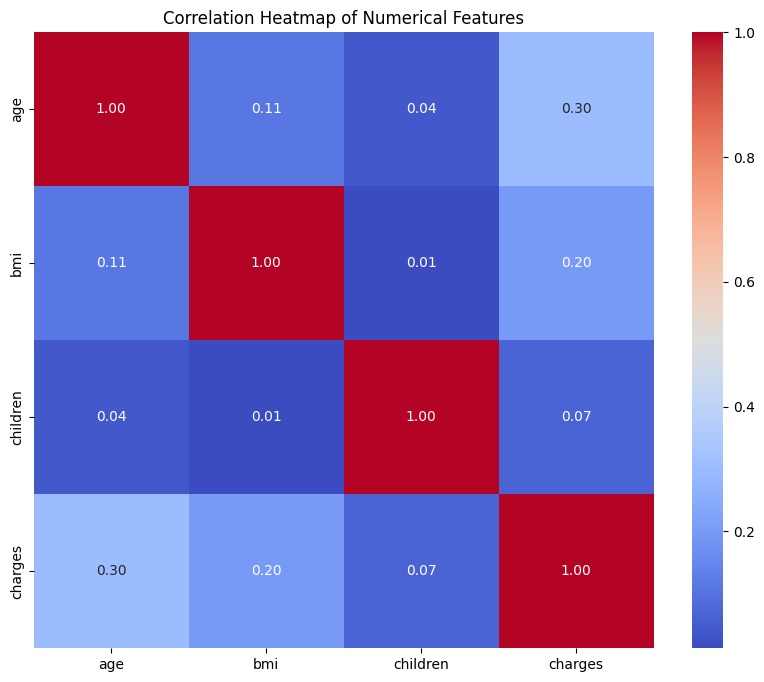

In [4]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Distribution and Relationship Plots

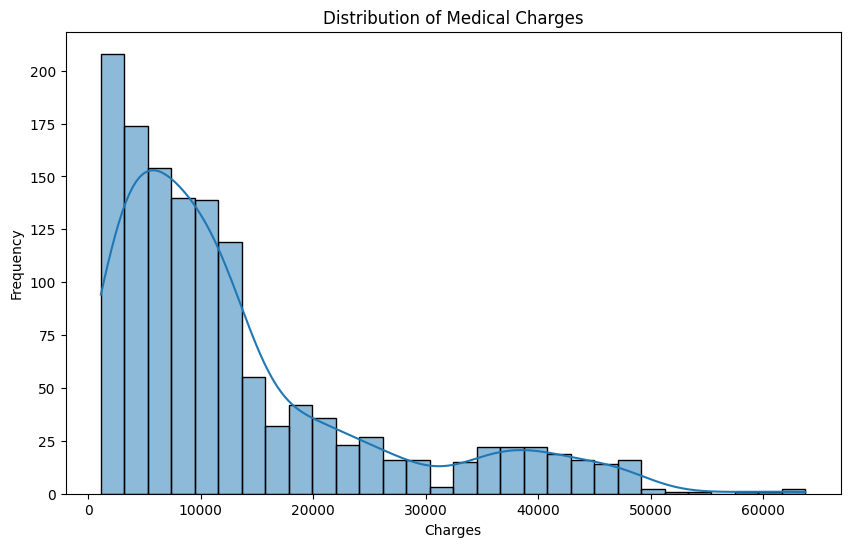

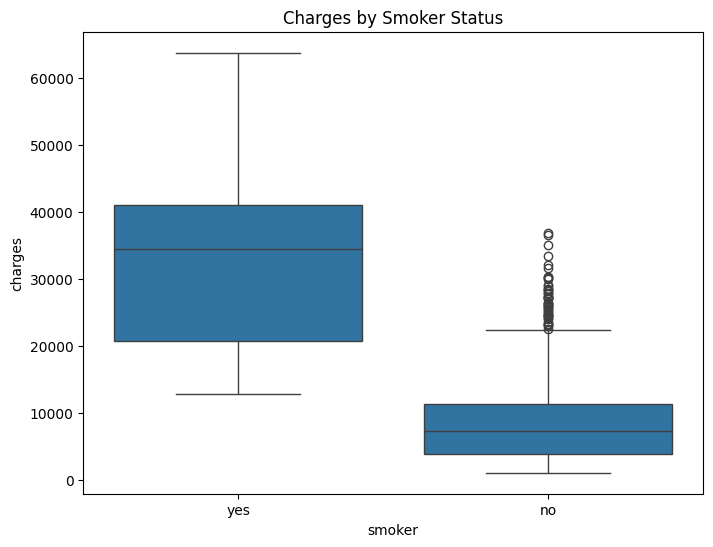

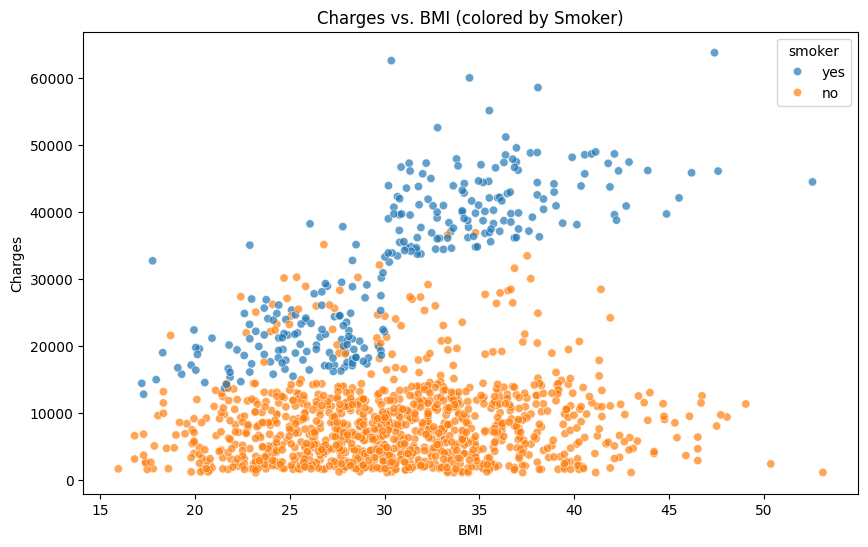

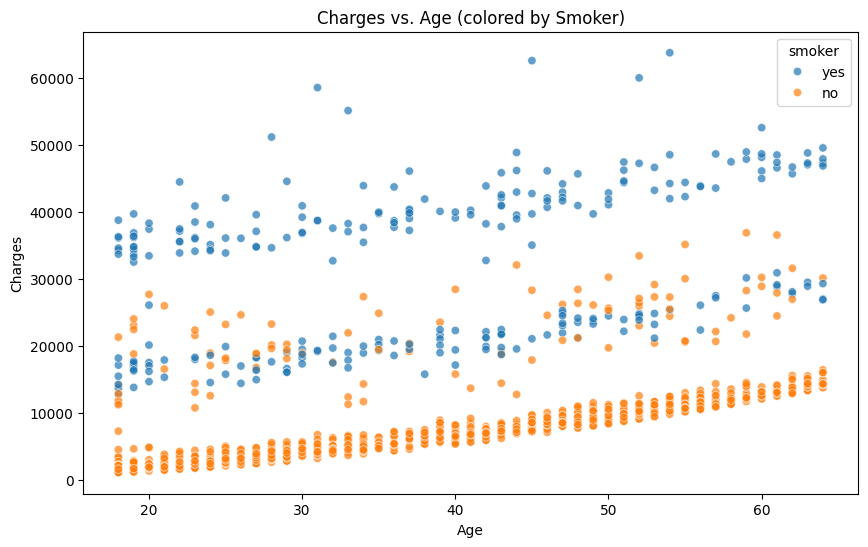

In [5]:
# Distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Charges vs. Smoker (categorical - very impactful feature)
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

# Charges vs. BMI (numerical)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', alpha=0.7)
plt.title('Charges vs. BMI (colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Charges vs. Age (numerical)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', alpha=0.7)
plt.title('Charges vs. Age (colored by Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

 Data Preprocessing & Splitting

In [6]:
# Separate features (X) and target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

print(f"Numerical features: {list(numerical_features)}")
print(f"Categorical features: {list(categorical_features)}")

# Create a column transformer for preprocessing
# Numerical features will be scaled using StandardScaler
# Categorical features will be one-hot encoded
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Numerical features: ['age', 'bmi', 'children']
Categorical features: ['sex', 'smoker', 'region']

Data split into training and testing sets.
X_train shape: (1070, 6)
X_test shape: (268, 6)
y_train shape: (1070,)
y_test shape: (268,)


 Training Different Regression Algorithms

In [7]:
# Define a dictionary of regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR(),
    'KNeighbors Regressor': KNeighborsRegressor()
}

results = {}

print("Training and evaluating models...\n")

for name, model in models.items():
    print(f"--- Training {name} ---")
    # Create a pipeline that first preprocesses the data then applies the regressor
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r2}
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")
    print("-" * 30 + "\n")

print("All models trained and evaluated.")

Training and evaluating models...

--- Training Linear Regression ---
  MAE: 4181.19
  MSE: 33596915.85
  RMSE: 5796.28
  R-squared (R2): 0.78
------------------------------

--- Training Random Forest Regressor ---
  MAE: 2541.61
  MSE: 21003637.61
  RMSE: 4582.97
  R-squared (R2): 0.86
------------------------------

--- Training Gradient Boosting Regressor ---
  MAE: 2404.90
  MSE: 18732863.28
  RMSE: 4328.15
  R-squared (R2): 0.88
------------------------------

--- Training Support Vector Regressor ---
  MAE: 8605.85
  MSE: 166204282.70
  RMSE: 12892.02
  R-squared (R2): -0.07
------------------------------

--- Training KNeighbors Regressor ---
  MAE: 3631.59
  MSE: 35984256.90
  RMSE: 5998.69
  R-squared (R2): 0.77
------------------------------

All models trained and evaluated.


**Performance Evaluation & Comparison **


--- Model Performance Comparison ---
                                     MAE           MSE          RMSE  R2 Score
Gradient Boosting Regressor  2404.901760  1.873286e+07   4328.147789  0.879336
Random Forest Regressor      2541.614594  2.100364e+07   4582.972573  0.864710
Linear Regression            4181.194474  3.359692e+07   5796.284659  0.783593
KNeighbors Regressor         3631.591179  3.598426e+07   5998.687932  0.768215
Support Vector Regressor     8605.845654  1.662043e+08  12892.023995 -0.070568


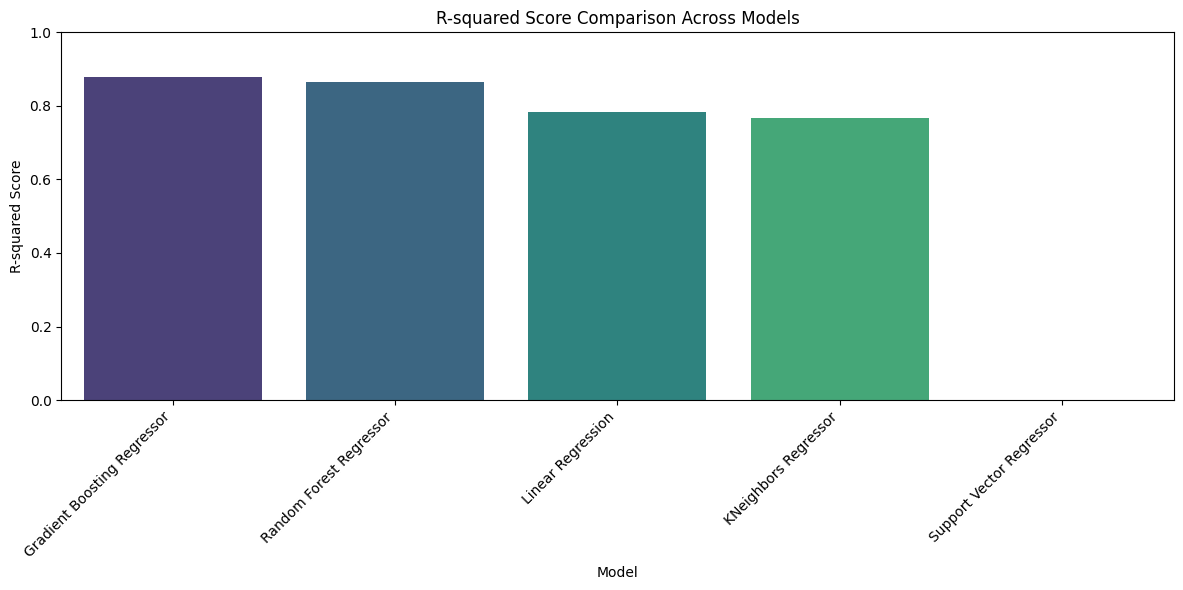

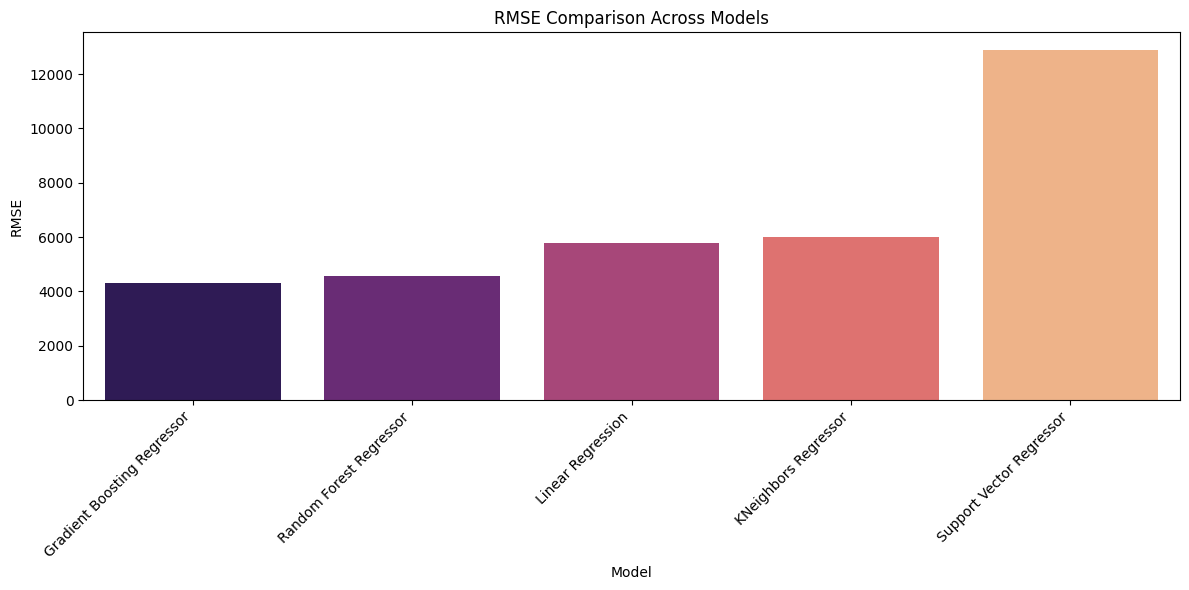

In [9]:
# Display all results in a DataFrame for easy comparison
results_df = pd.DataFrame(results).T # Transpose to have models as rows
results_df = results_df.sort_values(by='R2 Score', ascending=False) # Sort by R2 for comparison

print("\n--- Model Performance Comparison ---")
print(results_df)

# Visualize R2 Score
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='R2 Score', data=results_df, palette='viridis')
plt.title('R-squared Score Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.ylim(0, 1) # R2 score typically ranges from 0 to 1
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize RMSE
plt.figure(figsize=(12, 6))
sns.barplot(x=results_df.index, y='RMSE', data=results_df, palette='magma')
plt.title('RMSE Comparison Across Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Prediction and Decision Making

In [10]:
# Choose the best model based on the results, e.g., Random Forest
best_model_name = results_df.index[0] # Get the name of the top performing model
best_model = models[best_model_name]
print(f"\n--- Selected Best Model: {best_model_name} ---")

# Retrain the best model on the entire dataset (X, y) for production use
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
('regressor', best_model)])
final_pipeline.fit(X, y) # Fit on the full dataset
print(f"{best_model_name} retrained on the full dataset.")
# Example: Make a prediction for a new, hypothetical customer
# Let's create a new customer's data as a pandas DataFrame
new_customer_data = pd.DataFrame([[30, 'male', 28.5, 1, 'northwest', 'no']],
columns=['age', 'sex', 'bmi', 'children', 'region', 'smoker'])
predicted_charges = final_pipeline.predict(new_customer_data)
print(f"\nPredicted charges for the new customer: ${predicted_charges[0]:.2f}")
# Example 2: A smoker with higher BMI
new_customer_data_smoker = pd.DataFrame([[45, 'female', 35.0, 2, 'southeast', 'yes']],
columns=['age', 'sex', 'bmi', 'children', 'region',
'smoker'])
predicted_charges_smoker = final_pipeline.predict(new_customer_data_smoker)
print(f"Predicted charges for a new smoker customer: ${predicted_charges_smoker[0]:.2f}")


--- Selected Best Model: Gradient Boosting Regressor ---
Gradient Boosting Regressor retrained on the full dataset.

Predicted charges for the new customer: $5064.07
Predicted charges for a new smoker customer: $42490.92
